In [1]:
import matplotlib.pyplot as plt

## 3
Ho appena ricevuto una fornitura di M = 10000 viti. Una frazione p = 0.2 di tali viti è
difettosa, nel senso che un certo numero K delle M viti fornitemi non è in grado di superare
senza spezzarsi una prova di carico.

## 3.1. 
Prendo 100 viti per montare alcuni scaffali. Quale modello probabilistico scegliereste per modellare la variabile casuale X = “numero di viti che dovrò scartare”? Specificatene i parametri, il valore atteso e la varianza.

In [28]:
M=10000
p=0.2
K=M*p
n=100

mean = n*K/M
var  = K/M*((M-K)/M)*n*((M-n)/(M-1))

print("mean:",mean)
print("var :",var )

mean: 20.0
var : 15.841584158415845


Text(0.5, 1.0, 'cdf')

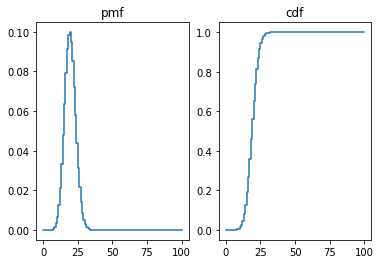

In [3]:
from scipy.stats import hypergeom

pmf = hypergeom(M, n, K).pmf(range(n+1))
cdf = hypergeom(M, n ,K).cdf(range(n+1))

fig,ax = plt.subplots(1,2)

ax[0].step(range(n+1),pmf)
ax[1].step(range(n+1),cdf)

ax[0].set_title("pmf")
ax[1].set_title("cdf")


## 3.2.1. 
quante viti devo aspettarmi di dover scartare?

In [4]:
print(mean)

20.0


## 3.2.2. 
quanto vale la probabilità che io debba scartare un numero di viti superiore a 10?

In [5]:
print(1-hypergeom(M, n ,K).cdf(10))               # opzione 1 usando la cdf
print(1-sum(hypergeom(M, n, K).pmf(range(11))))   # opzione 2 usando la pmf


0.9944875257551016
0.9944875257551016


## 3.2.3. 
quanto vale la probabilità che io debba scartare un numero di viti compreso tra 15 e 25 estremi compresi?

In [6]:
print(hypergeom(M, n ,K).cdf(25)-hypergeom(M, n ,K).cdf(14)) # opzione 1 usando la cmf
print(sum(hypergeom(M, n, K).pmf(range(15,26))))            # opzione 1 usando la pmf

0.8342016437716413
0.8342016437716413


## 3.2.4. 
confrontate questo ultimo risultato con la minorazione data dalla diseguaglianza diChebyshev, per controllare che esso soddisfa la diseguaglianza

In [7]:
w = 5
print("Chebyshev bound:", 1-(var/(w**2)))
print("actual prob    :", sum(hypergeom(M, n, K).pmf(range(15,26))))
print("is it respected:", sum(hypergeom(M, n, K).pmf(range(15,26))) >= 1-(var/(w^2)))

Chebyshev bound: 0.3535999999999998
actual prob    : 0.8342016437716413
is it respected: True


## 3.3. 
A lavoro terminato, tra le 100 viti che avevo preso, ne sono risultate difettose ben 30. Qual è la probabilità che ciò accadesse?

In [8]:
hypergeom(M, n ,K).pmf(30)

0.005063128612366128

## 3.4. 
Chiamo q la probabilità di scartare un numero di viti al più uguale a s. Se prendo n=100
viti e voglio che q sia almeno uguale a 0.8 la probabilità di scartare al più s viti, quanto
vale s?

In [9]:
# s è il quantile 0.8 della distribuzione
q=0.8
s=hypergeom(M, n, K).ppf(q)
print(s)
hypergeom(M, n, K).cdf(s)


23.0


0.812028338765467

## 4
Riguardo al problema descritto nell’esercizio precedente e alla variabile casuale X che conta il
numero di viti che dovrò scartare:
## 4.1. 
ci sono le condizioni per poter approssimare il modello che avete ipotizzato con un altro
modello?

Si, quando M >> 1 allora H(M,K,n) tende binomiale(n,p=K/M)

## 4.2.1. 
Qual è il numero più probabile di viti che dovrò scartare?

In [29]:
p = K/M
n * p

20.0

## 4.2.2. 
rispondete alle stesse domande del punto 2 dell’esercizio precedente usando l’approssimazione, e confrontate i risultati numerici che avete ottenuto nei due casi, per controllare che i risultati ottenuti sono molto simili (e quindi l’approssimazione è
ben giustificata).

In [11]:
from scipy.stats import binom

print(1-hypergeom(M, n ,K).cdf(10))               # opzione 1 usando la cdf
print(1-sum(hypergeom(M, n, K).pmf(range(11))))   # opzione 2 usando la pmf

print(1-binom(n,p).cdf(10))               # opzione 1 usando la cdf
print(1-sum(binom(n,p).pmf(range(11))))   # opzione 2 usando la pmf


0.9944875257551016
0.9944875257551016
0.9943036190442065
0.9943036190442066


In [30]:
print(hypergeom(M, n ,K).cdf(25)-hypergeom(M, n ,K).cdf(14)) # opzione 1 usando la cmf
print(sum(hypergeom(M, n, K).pmf(range(15,26))))            # opzione 1 usando la pmf

print(binom(n,p).cdf(25)-binom(n,p).cdf(14)) # opzione 1 usando la cmf
print(sum(binom(n,p).pmf(range(15,26))))            # opzione 1 usando la pmf

0.8342016437716413
0.8342016437716413
0.8320808942183764
0.8320808942183586


In [31]:
w = 5
print("Chebyshev bound:", 1-(var/(w**2)))
print("actual prob    :", sum(hypergeom(M, n, K).pmf(range(15,26))))
print("actual prob    :", sum(binom(n,p).pmf(range(15,26))))
print("is it respected:", sum(hypergeom(M, n, K).pmf(range(15,26))) >= 1-(var/(w^2)))
print("is it respected:", sum(binom(n,p).pmf(range(15,26))) >= 1-(var/(w^2)))

Chebyshev bound: 0.3663366336633662
actual prob    : 0.8342016437716413
actual prob    : 0.8320808942183586
is it respected: True
is it respected: True


## 5 
Ciascuna vite costa 1.5 centesimi. Se quando faccio un lavoro raccolgo le viti che si sono spezzate
e le invio al fornitore, ricevo il rimborso del costo pagato. Prendo n=100 viti per iniziare un
lavoro.

## 5.1. 
Esprimere, in funzione di X, la variabile casuale C =“ rimborso che potrei ottenere dal
fornitore”.

C = 1.5*X

## 5.2. 
C è una variabile discreta o continua? Giustificare la risposta

C è una variabile discreta in quanto puo assumere un numero finito di valori, tanti quanti ne può assumere X.

## 5.3. 
Quanti e quali valori può assumere C?

X poteva assumere valori da 0 a 100, di conseguenza 101, esattamente quelli anche C può assumere.  
In particolare può assumere {0, 1.5, 1.5x2, 1.5x3, .. 150}

## 5.4. 
Con quale probabilità assume ciascun valore?

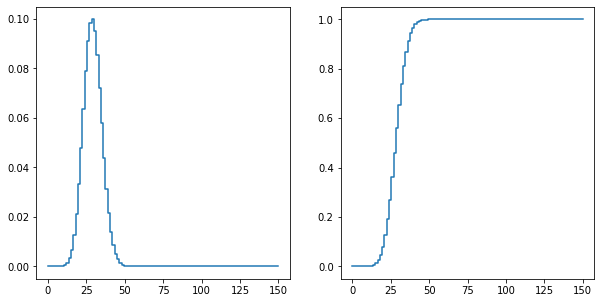

In [42]:
import numpy
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].step(numpy.arange(0,n+1)*1.5,hypergeom(M, n ,K).pmf(range(n+1)))
ax[1].step(numpy.arange(0,n+1)*1.5,hypergeom(M, n ,K).cdf(range(n+1)))

## 5.5. 
Qual è il rimborso atteso?

E(C)=E(1.5 \* X)=1.5 \* E(X) per la proprietà di linearità di E(X) (20*1.5 = 30)

## 5.6. 
Calcolare la probabilità di ottenere un rimborso di 18 euro.

In [15]:
numero_di_viti_difettose = 18/1.5 #(12)
print(hypergeom(M, n ,K).pmf(numero_di_viti_difettose))
print(binom(n,p).pmf(numero_di_viti_difettose))


0.012543062124135272
0.012753876873275446


## 6.
C’è un altro imprevisto la fornitura di viti contiene metà delle viti con taglio “a croce”, e metà
con taglio “piatto”. Il mio cacciavite è a croce. Ho portato con me la scatola con 100 viti e mio
figlio come assistente, che mi porge una vite per volta, la controlla e me la passa se è a croce,
altrimenti, invece di metterla da parte, la rimette nella scatola (ha solo 4 anni....).

la probabilità che la vite sia a croce è p=0.5

## 6.2. 
Quale modello probabilistico scegliereste per modellare la variabile casuale Y che conta
il numero di tentativi prima che la vite scelta da mio figlio sia quella giusta?

geometrica, Y ~ G(p=0.5)

## 6.3. 
Qual è la probabilità che si debbano aspettare meno di 3 tentativi prima di avere una
vite a croce?

In [16]:
from scipy.stats import geom
p = 0.5
geom(p).cdf(3)

0.875

## 6.4. 
Mio figlio propone di fare una scommessa: indovinare quanti tentativi saranno necessari
prima di ottenere una vite a croce. Lui punta su 2 tentativi.
Qual è la probabilità che si debbano aspettare esattamente 2 tentativi prima di avere una
vite a croce?

In [17]:
geom(p).pmf(3)

0.125

## 6.5. 
Mio figlio ha appena rimesso una vite a taglio piatto nella scatola, ed è convinto di avere
maggiori probabilità di vincere la scommessa ora. Gli date ragione?

si, per la mancanza di memoria della geometrica:
P(Y=2|Y>=1)=P(Y=1) e di conseguenza P(Y=1) > P(Y=2)

P(la 15 vite è a croce | non ho una croce per almeno 10 estrazione) = P(la 5 estrazione è a croce)